In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target']=iris.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df[df.target==1].shape

(50, 5)

In [13]:
df[df.target==2].shape

(50, 5)

In [17]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [18]:
%matplotlib inline

In [21]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

Text(0, 0.5, 'sepal width (cm)')

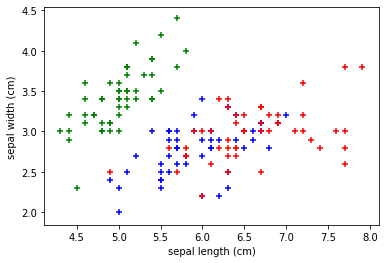

In [31]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',marker='+')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

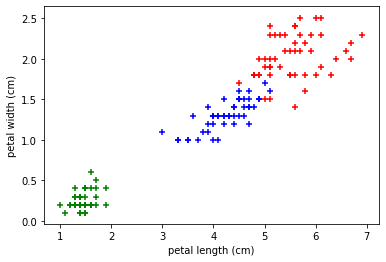

In [32]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',marker='+')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

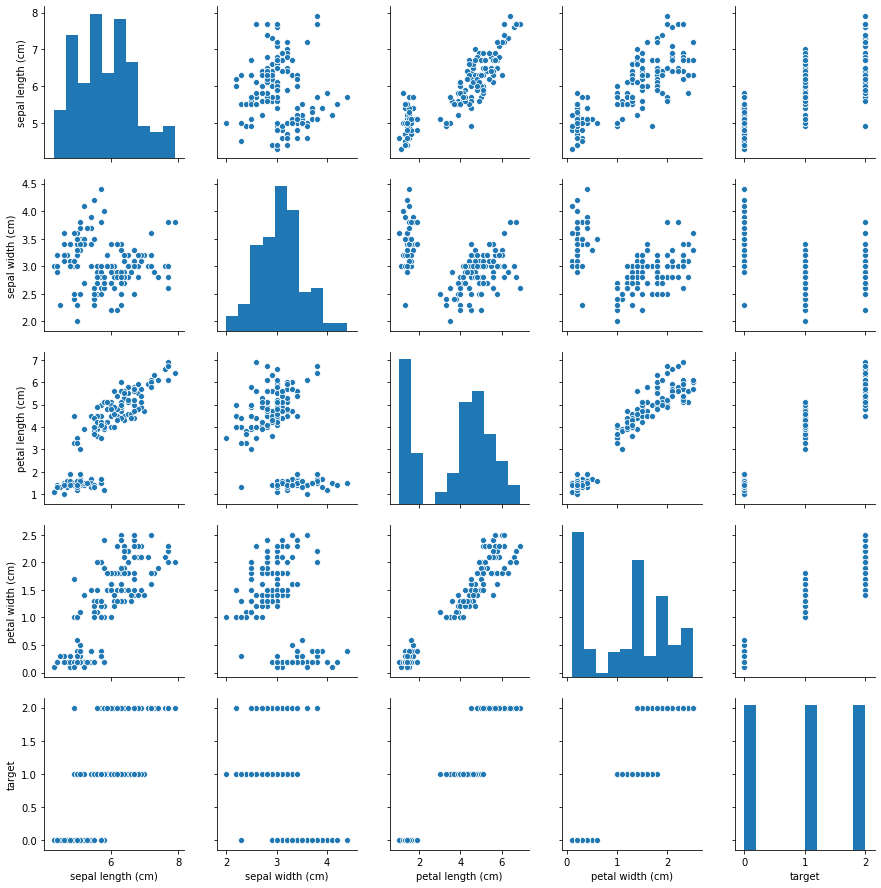

In [38]:
import seaborn as sn
sn.pairplot(df)

In [39]:
from sklearn.model_selection import train_test_split

In [62]:
x=df.drop(['target','flower_name'],axis='columns')
y=df.target

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
len(x_train)

120

In [117]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')

In [118]:
model.fit(x_train,y_train)

/home/rupam/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [119]:
y_pred=model.predict(x_test)

In [120]:
model.score(x_test,y_test)

0.9666666666666667

In [121]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)

In [122]:
cm

array([[13,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  8]])